In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

In [29]:
# Load the data from the CSV file
data = pd.read_csv('../data/data_preparation/LLA_Kernel.csv')

# Separate the features (X) from the target variable (y)
X = data.drop('LLA_Kernel', axis=1)
y = data['LLA_Kernel']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Create and train the Random Forest model
print("Training in progress ...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

Training in progress ...


RandomForestRegressor(random_state=42)

In [31]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

In [32]:
# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [36]:
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf)

Random Forest - Mean Squared Error: 1.221151804869329
Random Forest - R-squared: 0.7346091617156698


In [37]:
# Save the trained model to a file
joblib.dump(rf_model,'../model_training/LLA_trained_model.joblib')

['../model_training/LLA_trained_model.joblib']

In [38]:
# Load data from the .dat file
data = []
with open('../data/output_predictions/LLA_output.dat', 'r') as file:
    for line in file:
        values = line.split()  # Assuming data is space-separated
        data.append([float(value) for value in values])

# Separate the data into x and y values (adjust accordingly)
x = [row[0] for row in data]
y = [row[1] for row in data]
# Define the desired x and y-axis ranges
x_min = -10  # Replace with your desired minimum x-value
x_max = 10  # Replace with your desired maximum x-value
y_min = 0  # Replace with your desired minimum y-value
y_max = 8  # Replace with your desired maximum y-value


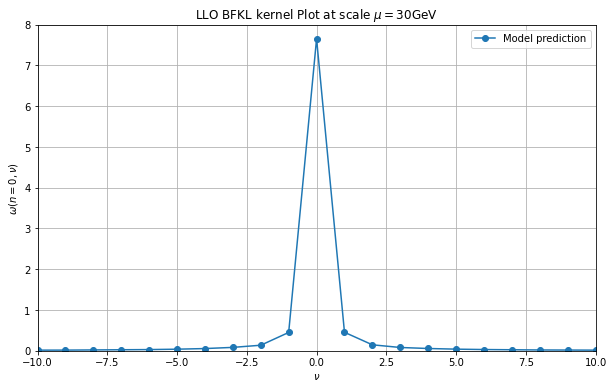

In [39]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Model prediction', marker='o', linestyle='-')

# Add labels and title
plt.xlabel('$\\nu$')
plt.ylabel('$\\omega(n=0,\\nu)$')
plt.title('LLO BFKL kernel Plot at scale $\\mu = 30$GeV')

# Add a legend (if needed)
plt.legend()

# Set x and y-axis ranges
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# Show the plot
plt.grid(True)
plt.show()